# Deep Learning Architectures

## Convolutionary Neural Networks

There are many Deep Learning architectures. A Deep Learning *architecture* refers to the overall structure or design of a neural network used for solving complex tasks using deep learning techniques. It represents the arrangement and combination of various layers, units, and connections that make up the neural network. First, let's look at the __Convolutionary Neural Network__ architecture(CNN).

#### Convolutionary Layers

The fundamental operation in CNNs is the __convolution__. Instead of connecting every neuron to every neuron in the next layer (as done in fully connected layers), in __convolutional layers__, each neuron is connected only to a small region of the input volume. This region is determined by the size of the *kernel* or *filter*. Filters/kernels are small windows (e.g., 3x3 or 5x5 matrices) that "slide" or "convolve" around the input data (like an image) to produce a __feature map__, sometimes called a convolved feature or an activation map. The idea is to detect basic patterns like edges, textures, and colors in this step. 

The __feature map__ is a representation of where specific features (as detected by the filter) appear in the input image. For instance, if a filter is designed to detect edges, the corresponding feature map will have higher values in places where there are edges in the input image and lower values elsewhere. Typically, a convolutional layer in a CNN doesn't have just one filter. It has many. So, for each filter, you get a different feature map. If you're using 32 filters, you'll get 32 different feature maps. Each of these maps will highlight different features in the input image.

Typically, this convolution process looks like this:

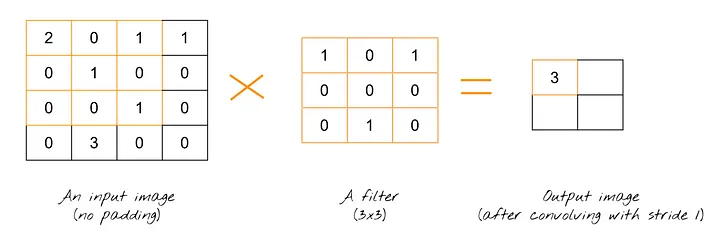

Each element is multiplied with an element in the corresponding location. Then you sum all the results, which is one output value. This continues until the filter passes through the entire image to find places in the image similar to what it is looking for. Higher values infer that that part of the image is most similar to what the filter is seeking.

#### Activation Function

The feature map produced from the convolution step is passed to an activation function. For CNNs specifically, the activation function used is called a __Rectified Linear Unit__ (ReLU). The ReLU for short is a *piecewise linear function* that will output the input directly if it is positive, otherwise, it will output zero. It has become the default activation function for many types of neural networks because a model that uses it is easier to train and often achieves better performance.

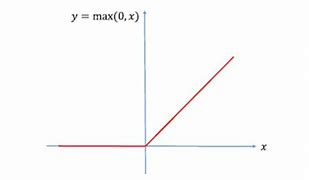

The function is linear for values greater than zero, meaning it has a lot of the desirable properties of a linear activation function when training a neural network using backpropagation. Yet, it is a nonlinear function as negative values are always output as zero.

#### Pooling Layers

Since the input data is essentially split up into so many small pieces, it can be alot for the model to evaluate all at once. This is where __pooling layers__ come in. Pooling layers significantly reduce the spatial dimensions (width and height) of the input volume, leading to reduced computation for subsequent layers. 

There are several types of pooling layers. __Max Pooling__ is the most commonly used pooling technique. Here, we select a window size (e.g., 2x2) and __stride__ (a stride is the number of pixels the filter moves during the convolution process), then slide this window across the feature map. At each position, only the maximum value within the window is passed on to the output, while others are discarded. So, for a 2x2 window, only the largest value from the 4 available will be taken.

Instead of taking the maximum value, __Average Pooling__ takes the average of all values within the window. So, for a 2x2 window, it computes the average of the 4 values.

Here is an example of Max Pooling vs Average Pooling using a 2x2 window on 4x4 input data.

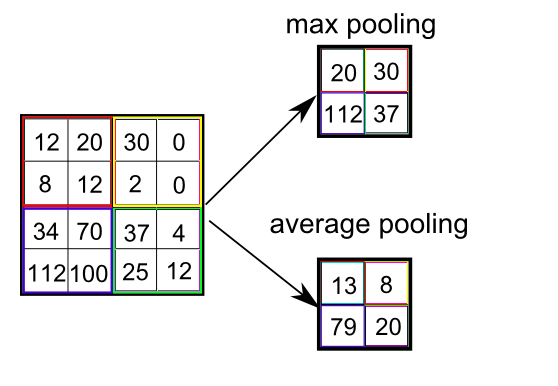

There are more types of pooling methods. Using different pooling methods can lead to varying levels of translational invariance and generalization. Some pooling methods might work better than others for certain tasks, and having multiple methods allows practitioners to experiment and find the optimal configuration.

#### Fully Connected Layers

After several convolutional and pooling layers in a CNN, we usually encounter one or more __fully connected layers__, which are standard feedforward neural network layers. Here's a breakdown of the fully connected layers:

The primary role of the fully connected layers is to take the high-level features (represented in the form of feature maps) extracted by the preceding convolutional layers and use them for classifying the input image into various classes (in case of classification tasks) or to produce some specific outputs (like bounding boxes in object detection).

Before feeding into a fully connected layer, the output of the final pooling or convolutional layer is flattened into a single vector. This vector contains all the information (features) that the CNN has recognized in the image. This is known as __Flattening__.

Then, every neuron in a fully connected layer is connected to every neuron in the preceding layer. Hence the name "fully connected." Each connection has a weight, and the neurons produce their output by applying an activation function to the weighted sum of their inputs. This is known as the __Dense Connection__.

The final fully connected layer, known as the __output layer__, has as many neurons as there are classes to predict (for classification tasks). For instance, in a binary classification problem, you'd have one or two neurons in the output layer, while in a 10-class classification problem (like *MNIST digit* classification), you'd have 10 neurons. The activation function applied in the output layer is chosen based on the nature of the prediction task (e.g., *softmax* for multi-class classification).

Here is an image of what the entire CNN architecure would look like with fully connected layers:

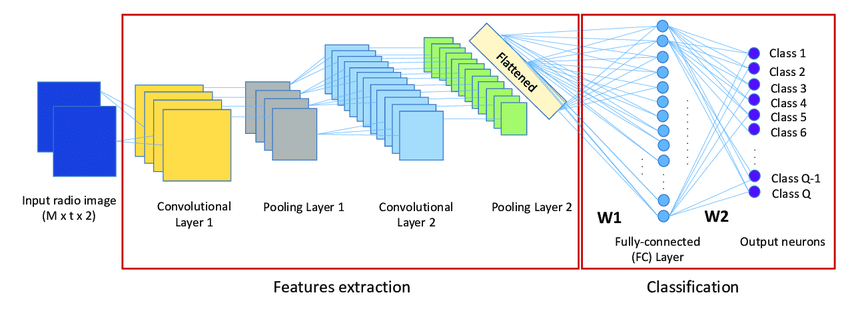



## Recurrent Neural Networks

### What is a Recurrent Neural Network?

Traditional neural networks like CNNs process inputs independently, without any consideration for sequence or past information. This makes them less suited for tasks like understanding a sentence, predicting a stock market's movement based on historical data, or analyzing a video frame-by-frame (all tasks that involve sequences). This is what makes __Recurrent Neural Networks__ so special.

Recurrent Neural Networks (RNNs) are a class of neural networks that maintain a "memory" (__hidden state__) from previous time steps. The core idea is to pass information from one step in the sequence to the next, allowing the network to maintain some context. RNNs are specifically designed to work with sequences. For instance, in tasks like language translation or time series prediction, the order and context of data points matter, and RNNs are built to handle this. 

Recurrent neural networks leverage __Backpropagation Through Time__ (BPTT) algorithm to determine the gradients, which is slightly different from traditional backpropagation as it is specific to sequence data. The principles of BPTT are the same as traditional backpropagation, where the model trains itself by calculating errors from its output layer to its input layer. These calculations allow us to adjust and fit the parameters of the model appropriately.

RNNs also have a variable amount of input neurons while traditional neural networks have a fixed number of input neurons. This works for problems involving languages or time-series data where the amount of data may vary from input to input (sentences can have different lengths and not all time series data has the same time-frame).

Here is what an RNN would look like:

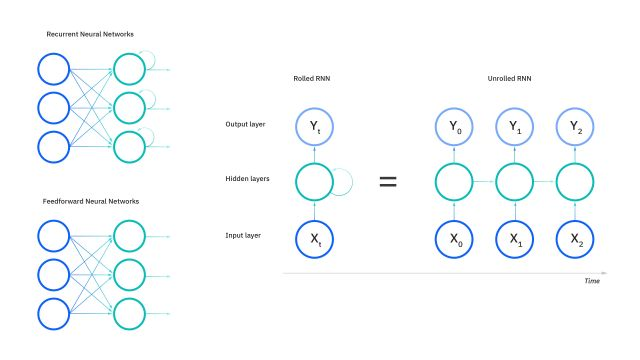

As you can see, the key difference between an RNN and a traditional neural network is the emphasis on time. The arrows on each of the green nodes represent the model using BPTT to train itself. The model first instantiates some random weight values for the hidden layer and generates an output for those weights. This occurs for the first time step. After that, the model enters the next time step or part of the sequence where it updates the weights based on the loss from the first time step. This would repeat for all the time steps or all parts in the sequence.

Let's go through the full intuition behind an RNN in the context of predicting the next word in a sentence.

### Training

First, we need to train the network using a large dataset. For the purpose, we can choose any large reading. When done training, we can input a sentence and expect a reasonable prediction based on the knowledge from the book.

This is what the model would look like when trying to fill out the rest of the sentence:

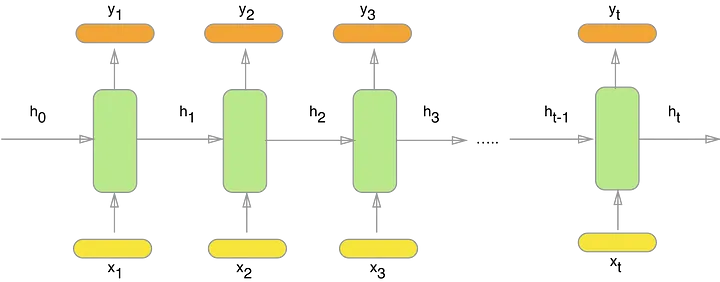

The variables x1 to xt represent all the words in the input sentence. The variables h0 to ht represent the words that come prior to the input words (h0 is the word that comes before x1, h1 is the word that comes before x2, etc). Lastly, y1 to yt represents the predicted next words.

In the context of predicting the next word of a sentence, we must remember that we cannot directly use strings to represent our words for our input data. In this case, we would need to go through a process called __embedding__. Embedding is a technique used to represent words, phrases, or even entire sentences as continuous vectors in a dense space. A vector in the context of Computer Science can be thought of as a Python list that stores numbers. There are several models like Word2Vec, GloVe, and FastText that are trained on massive corpora (e.g., the entire Wikipedia) to generate word embeddings. These models can capture semantic relationships between words because of the vast amount of data they are trained on.

We could also use a simpler technique such as __One-hot Encoding__. One-hot Encoding involves using a vector filled with 0s. The length of the vector would be based on the amount of words. Our current input word would have a 1 in place of the 0. The 0 that we would replace is based on the sequence of the words. If we had 3 words in our sentence, we would have a vector initially like so: [0, 0, 0]. Once our RNN meets the first input word, the first 0 would become 1 to denote that that is the word we are using. This would occur for every future word we are trying to predict off of.

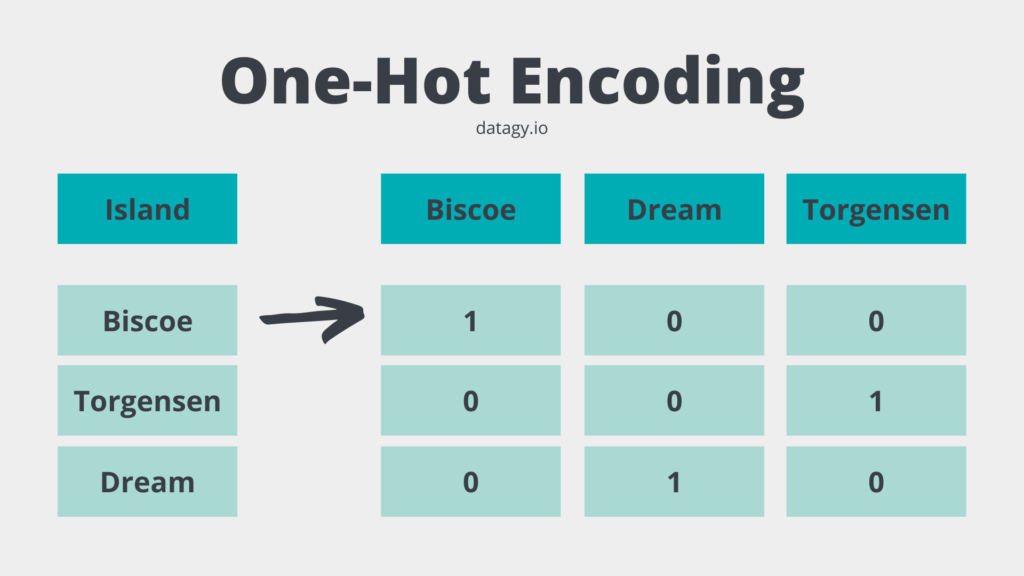

### Hidden State

As stated earlier, the __hidden state__, often denoted as ℎ (like our h variable from the previous image), is a vector that carries information from previous steps of the sequence being processed. 

At the very beginning (i.e., before processing the first item in a sequence), the hidden state is typically initialized to zeros or some predefined value. As each item in the sequence is processed, the hidden state gets updated. Let's consider an RNN processing a sequence item-by-item.

For each item, the RNN takes in the current item and the hidden state from the previous step. The network combines these inputs, processes them (using a set of weights and typically a non-linear activation function), and then produces an updated hidden state for the next step and the "output" for the current step (e.g., a prediction). As the RNN processes more items in the sequence, the hidden state keeps getting updated, carrying forward information from previous steps. This mechanism allows the RNN to have a form of memory. When processing the nth item in a sequence, the hidden state holds information not just about the (n-1)th item, but also about items before that, albeit with diminishing influence as we go further back.

The hidden state in recurrent neural networks (RNNs) is a bit abstract and can be difficult to describe in precise terms, but it plays a pivotal role in the function of the network.

### Forward Pass

Now that we know how RNNs work on the surface level, let's connect what we learned to better understand the overall flow of information in an RNN! 

Thinking back to the image of an RNN from earlier, our input data is passed through our model. In the context of any problem dealing with words, our input data would have to be converted to integers or floats. Then our data is passed through an activation function. This data is passed through with the value of the hidden state. In our first time step, this hidden state value would typically be 0. The true value of what is passed into the activation function would be the product of the input and its weight summed with the product of the previous hidden state and it's own weight. There would be an additional bias term added to the previous sum. 

Essentially, the *memory* or *context* from the previous time step is used for future time steps. In the context of our word predicting problem, this allows us to keep the relevance of prior words in mind when going through the entire sentence. This lets the model account for differing meanings of sentences that have the same collection of words in a different order (just like how 'Jenny works at Google in San Francisco' is slightly different from 'In San Francisco, Jenny works at Google').


## Long Short Term Memory Models

__LSTMs__ (Long Short-Term Memory networks) are a type of RNN. They were specifically designed to address some of the shortcomings of generic RNNs. Let's first discuss why LSTMs are used and how they differentiate themselves from generic RNNs:

__Vanishing Gradient Problem__: As RNNs are trained, they use a technique called backpropagation to adjust their weights. For sequences of significant length, generic RNNs can suffer from what's termed the "vanishing gradient problem." This means that the gradients – values used to adjust the network's weights – become exceedingly small, effectively preventing the network from learning long-range dependencies. 

__Exploding Gradient Problem__: Conversely, the gradients can also become exceedingly large, causing weights to be updated dramatically and potentially destabilizing the learning process.

LSTMs introduce the concept of a __memory cell__ – a unit that can maintain its state over time, making them more apt to remember or forget certain values over longer sequences. While RNNs have a short term memory, LSTMs lengthen this short term memory, hence the name, Long Short-Term Memory. LSTMs also utilize __gating units__ that manage the flow of information. These __gates__ decide what information to throw away or keep, allowing for more extended memory and more controlled flow of information. 

Here's an image of what an LSTM may look like:

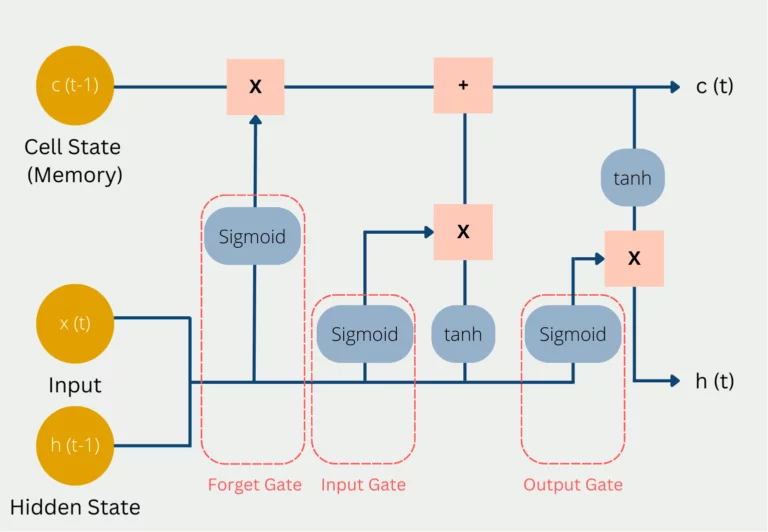

Let's dive deeper into these key components of an LTSM.

### Cell State 

The core of the LSTM's architecture is the __cell state__, often visualized as a horizontal line running through the top of the cell. Imagine this as a kind of conveyor belt. It has the ability to convey information straight down the sequence with minimal transformations, ensuring the LSTM can carry (or forget) data across long sequences.

### Gates

As mentioned earlier, LSTMs utilize gates. They employ sigmoid activations, squashing values between 0 and 1. This way, they can allow certain pieces of information to pass through (values close to 1) or block them (values close to 0). There are three main gates in an LSTM:

##### Forget Gates

In the so-called __Forget Gate__, it is decided which current and previous information is kept and which is thrown out. This includes the hidden status from the previous pass and the current input. The results (the values close to 1 or 0) from this are multiplied by the current Cell State so that knowledge that is no longer needed is forgotten since it is multiplied by 0 and thus dropped out.

##### Input Gates

In the __Input Gate__, it is decided how valuable the current input is to solve the task. For this, the current input is multiplied by the hidden state and the weight matrix of the last run. All information that appears important in the Input Gate is then added to the Cell State and forms the new Cell State c(t). This new Cell State is now the current state of the long-term memory and will be used in the next run.

##### Output Gates

In the __Output Gate__, the output of the LSTM model is then calculated in the hidden state (refer back to the RNN section for what a hidden state is). Depending on the application, it can be, for example, a word that complements the meaning of the sentence. To do this, the sigmoid function decides what information can come through the output gate and then the cell state is multiplied after it is activated with the tanh function.

The tanh function squashes its input values to a range between -1 and 1. This range is useful for normalizing the outputs and keeping them centered around zero.

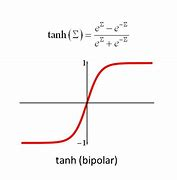

### Flow of Information

For each time step in a sequence, the LSTM cell takes in the current input, the previous hidden state, and the previous cell state. It processes these inputs through its gates, leading to the generation of a new hidden state and cell state. These states are then passed on to the next time step or utilized for predictions.